Bộ dữ liệu: Cifar 10 - phức tạp hơn nhiều so với MNIST
- Ảnh màu RGB
- Kích thước: 32x32
- Training set: 50000 samples
- Testing set: 10000 samples


# 1. Load libaries

In [11]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras import regularizers, optimizers 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline


# 2. Read data

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [13]:
print(x_train.shape)
print(type(x_train))

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


# 3. Data exploration

In [14]:
def plot_images(data, label, nrows = 3, ncols = 3):
    """
    Display  `nrows*ncols` images randomly from data_dir folder
    """
    fig = plt.figure(figsize = (nrows*ncols , nrows*ncols))

    for i in range(1, nrows*ncols + 1):
        sample_idx = tf.random.uniform((1,1), maxval=len(data), dtype= tf.dtypes.int32).numpy().item() # lấy ngẫu nhiên các mẫu trong dữ liệu
        fig.add_subplot(nrows, ncols, i)
        plt.imshow(data[sample_idx])
        plt.axis("off")
        plt.title(label[sample_idx])

    # fig.suptitle(label[sample_idx], fontweight = 'bold') 
    plt.tight_layout()
    plt.show()

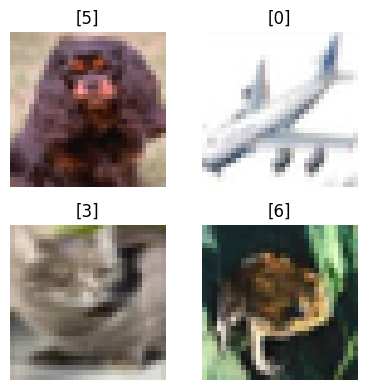

In [15]:
plot_images(x_train, y_train,2,2)

# 4. Normalize data

In [16]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test  = x_test/255.0

# 5. Create simple model
- This model work well on Fashion Mnist

In [17]:
# create model
model = keras.Sequential()
model.add(keras.Input(shape=(32,32,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               786688    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [18]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])


In [19]:
# training
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = None)

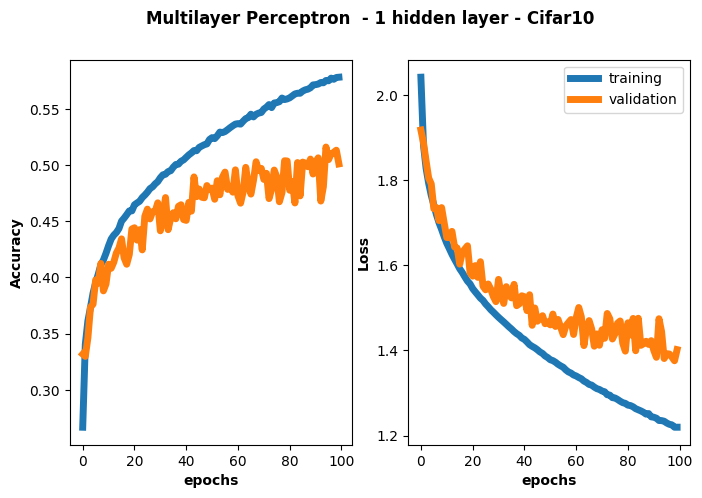

In [34]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (8,5))
axs[0].plot(range(len(history.history['sparse_categorical_accuracy'])), history.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history.history['val_sparse_categorical_accuracy'])), history.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history.history['loss'])), history.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history.history['val_loss'])), history.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("Multilayer Perceptron  - 1 hidden layer - Cifar10", fontweight = 'bold')
plt.show()

In [21]:
model2 = keras.models.Sequential()
model2.add(tf.keras.Input(shape = (32,32,3)))

model2.add(keras.layers.Conv2D(filters = 64,kernel_size=(3,3), strides = 1, padding = 'same', activation = 'sigmoid')) 
model2.add(keras.layers.Conv2D(filters = 64, kernel_size =(3,3), strides = 1, padding = 'same', activation = 'sigmoid'))
model2.add(keras.layers.MaxPooling2D(2))

model2.add(keras.layers.Conv2D(filters = 128,kernel_size=(3,3), strides = 1, padding = 'same', activation = 'sigmoid')) 
model2.add(keras.layers.Conv2D(filters = 128, kernel_size =(3,3), strides = 1, padding = 'same', activation = 'sigmoid'))
model2.add(keras.layers.MaxPooling2D(2))


model2.add(keras.layers.Conv2D(filters = 256,kernel_size=(3,3), strides = 1, padding = 'same', activation = 'sigmoid')) 
model2.add(keras.layers.Conv2D(filters = 256, kernel_size =(3,3), strides = 1, padding = 'same', activation = 'sigmoid'))
model2.add(keras.layers.MaxPooling2D(2))

# Flatten
model2.add(keras.layers.Flatten())
# model2.add(keras.layers.Dense(512, activation = 'sigmoid'))
model2.add(keras.layers.Dense(10, activation = 'softmax')) 
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                  

In [22]:
# optimizer and loss
opt = tf.keras.optimizers.Adam(0.0001)
model2.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])



In [23]:
# training
history2 = model2.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = 2)

Epoch 1/100
196/196 - 21s - loss: 2.3216 - sparse_categorical_accuracy: 0.1004 - val_loss: 2.3116 - val_sparse_categorical_accuracy: 0.1000 - 21s/epoch - 105ms/step
Epoch 2/100
196/196 - 10s - loss: 2.3110 - sparse_categorical_accuracy: 0.0977 - val_loss: 2.3129 - val_sparse_categorical_accuracy: 0.1000 - 10s/epoch - 51ms/step
Epoch 3/100
196/196 - 10s - loss: 2.3121 - sparse_categorical_accuracy: 0.1009 - val_loss: 2.3063 - val_sparse_categorical_accuracy: 0.1000 - 10s/epoch - 49ms/step
Epoch 4/100
196/196 - 10s - loss: 2.3109 - sparse_categorical_accuracy: 0.1000 - val_loss: 2.3094 - val_sparse_categorical_accuracy: 0.1000 - 10s/epoch - 52ms/step
Epoch 5/100
196/196 - 11s - loss: 2.2161 - sparse_categorical_accuracy: 0.1724 - val_loss: 2.0683 - val_sparse_categorical_accuracy: 0.2554 - 11s/epoch - 56ms/step
Epoch 6/100
196/196 - 10s - loss: 2.0398 - sparse_categorical_accuracy: 0.2672 - val_loss: 1.9855 - val_sparse_categorical_accuracy: 0.3038 - 10s/epoch - 50ms/step
Epoch 7/100
196

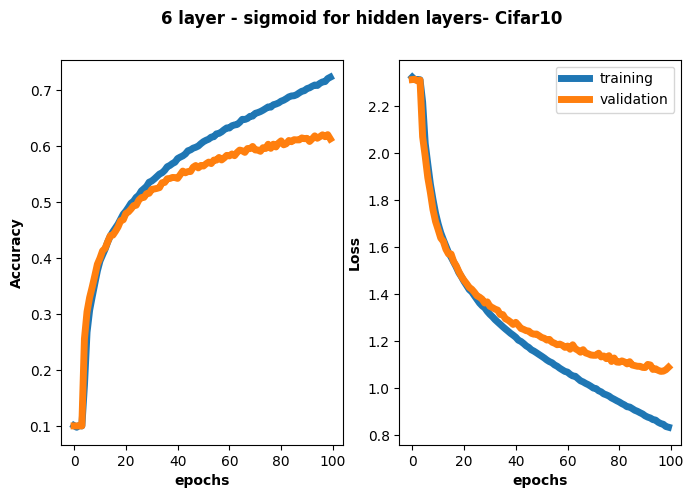

In [35]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (8,5))
axs[0].plot(range(len(history2.history['sparse_categorical_accuracy'])), history2.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history2.history['val_sparse_categorical_accuracy'])), history2.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history2.history['loss'])), history2.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history2.history['val_loss'])), history2.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("6 layer - sigmoid for hidden layers- Cifar10", fontweight = 'bold')
plt.show()

In [25]:
# model - 9 layer - sigmoid
model3 = keras.models.Sequential()
model3.add(tf.keras.Input(shape=(32, 32, 3)))

model3.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.MaxPooling2D(2))

model3.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.MaxPooling2D(2))

model3.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='sigmoid'))
model3.add(keras.layers.MaxPooling2D(2))

# flatten
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(512, activation='sigmoid'))
model3.add(keras.layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       147584    
                                                      

In [26]:
# optimizer and loss
# opt = tf.keras.optimizers.Adam(0.0001)
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history3 = model3.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = 2)

Epoch 1/100
196/196 - 20s - loss: 2.3581 - sparse_categorical_accuracy: 0.1003 - val_loss: 2.3204 - val_sparse_categorical_accuracy: 0.1000 - 20s/epoch - 103ms/step
Epoch 2/100
196/196 - 16s - loss: 2.3144 - sparse_categorical_accuracy: 0.1004 - val_loss: 2.3056 - val_sparse_categorical_accuracy: 0.1000 - 16s/epoch - 83ms/step
Epoch 3/100
196/196 - 16s - loss: 2.3145 - sparse_categorical_accuracy: 0.1000 - val_loss: 2.3240 - val_sparse_categorical_accuracy: 0.1000 - 16s/epoch - 81ms/step
Epoch 4/100
196/196 - 16s - loss: 2.3122 - sparse_categorical_accuracy: 0.0983 - val_loss: 2.3137 - val_sparse_categorical_accuracy: 0.1000 - 16s/epoch - 79ms/step
Epoch 5/100
196/196 - 15s - loss: 2.3107 - sparse_categorical_accuracy: 0.0986 - val_loss: 2.3099 - val_sparse_categorical_accuracy: 0.1000 - 15s/epoch - 79ms/step
Epoch 6/100
196/196 - 16s - loss: 2.3118 - sparse_categorical_accuracy: 0.1012 - val_loss: 2.3188 - val_sparse_categorical_accuracy: 0.1000 - 16s/epoch - 81ms/step
Epoch 7/100
196

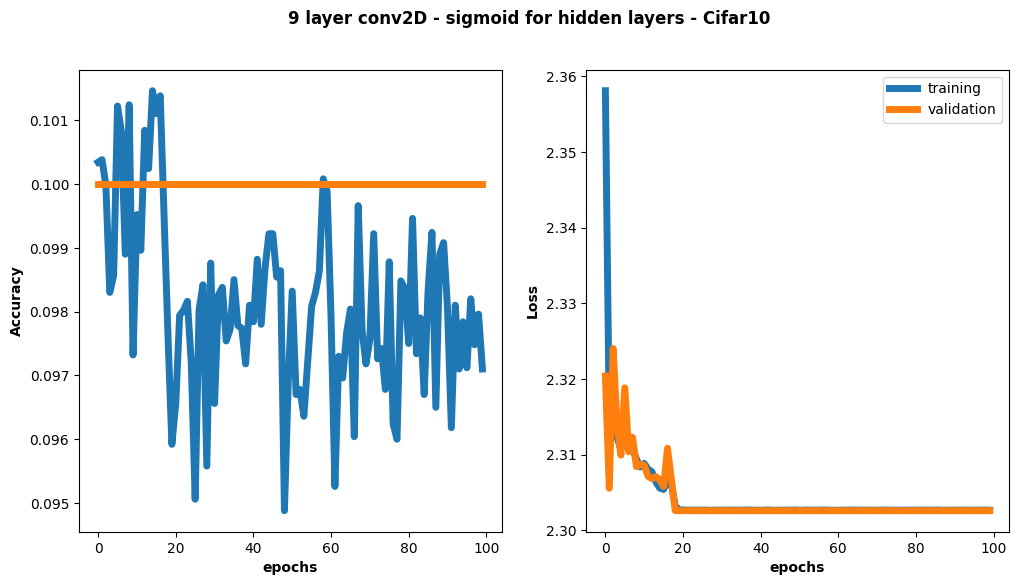

In [30]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(history3.history['sparse_categorical_accuracy'])), history3.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history3.history['val_sparse_categorical_accuracy'])), history3.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history3.history['loss'])), history3.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history3.history['val_loss'])), history3.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("9 layer conv2D - sigmoid for hidden layers - Cifar10", fontweight = 'bold')
plt.show()

In [31]:
# model - 9 layer - relu
model4 = keras.models.Sequential()
model4.add(tf.keras.Input(shape=(32, 32, 3)))

model4.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.MaxPooling2D(2))

model4.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.MaxPooling2D(2))

model4.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu'))
model4.add(keras.layers.MaxPooling2D(2))

# flatten
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(512, activation='relu'))
model4.add(keras.layers.Dense(10, activation='softmax'))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       147584    
                                                      

In [32]:
# optimizer and loss
# opt = tf.keras.optimizers.Adam(0.0001)
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history4 = model4.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    batch_size=256, 
                    epochs=100, verbose = 2)

Epoch 1/100
196/196 - 21s - loss: 1.9371 - sparse_categorical_accuracy: 0.2737 - val_loss: 1.5704 - val_sparse_categorical_accuracy: 0.4177 - 21s/epoch - 106ms/step
Epoch 2/100
196/196 - 14s - loss: 1.3767 - sparse_categorical_accuracy: 0.4984 - val_loss: 1.1905 - val_sparse_categorical_accuracy: 0.5644 - 14s/epoch - 71ms/step
Epoch 3/100
196/196 - 14s - loss: 1.0502 - sparse_categorical_accuracy: 0.6229 - val_loss: 0.9405 - val_sparse_categorical_accuracy: 0.6716 - 14s/epoch - 71ms/step
Epoch 4/100
196/196 - 14s - loss: 0.8276 - sparse_categorical_accuracy: 0.7069 - val_loss: 0.8503 - val_sparse_categorical_accuracy: 0.7011 - 14s/epoch - 70ms/step
Epoch 5/100
196/196 - 14s - loss: 0.6847 - sparse_categorical_accuracy: 0.7582 - val_loss: 0.8014 - val_sparse_categorical_accuracy: 0.7255 - 14s/epoch - 70ms/step
Epoch 6/100
196/196 - 14s - loss: 0.5557 - sparse_categorical_accuracy: 0.8047 - val_loss: 0.6728 - val_sparse_categorical_accuracy: 0.7666 - 14s/epoch - 72ms/step
Epoch 7/100
196

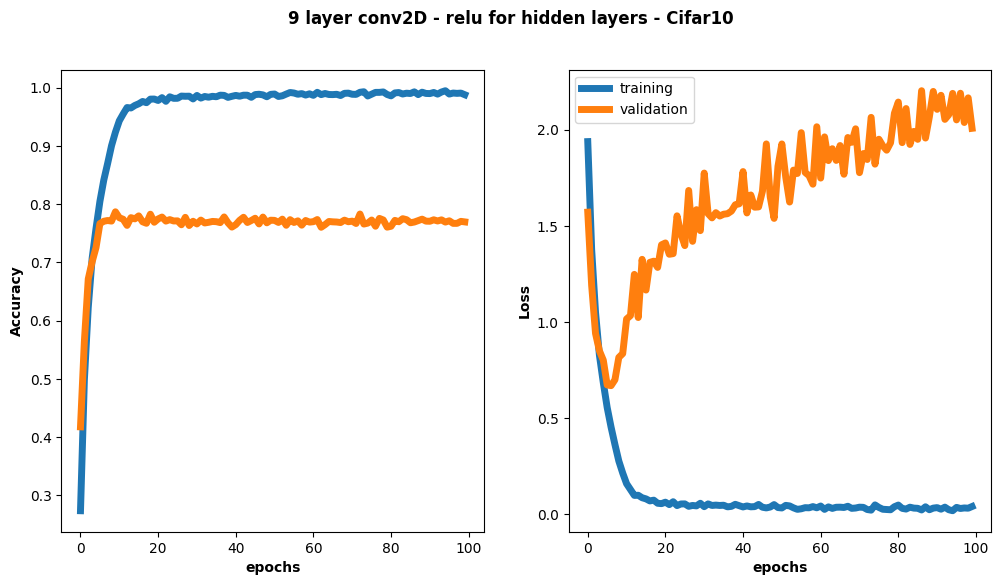

In [33]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(history4.history['sparse_categorical_accuracy'])), history4.history['sparse_categorical_accuracy'], label='training', linewidth = 5)
axs[0].plot(range(len(history4.history['val_sparse_categorical_accuracy'])), history4.history['val_sparse_categorical_accuracy'], label='validation', linewidth = 5)
axs[1].plot(range(len(history4.history['loss'])), history4.history['loss'], label='training', linewidth = 5)
axs[1].plot(range(len(history4.history['val_loss'])), history4.history['val_loss'], label='validation', linewidth = 5)
axs[0].set_xlabel("epochs", fontweight = 'bold')
axs[1].set_xlabel("epochs", fontweight = 'bold')
axs[0].set_ylabel("Accuracy", fontweight = 'bold')
axs[1].set_ylabel("Loss", fontweight = 'bold')
plt.legend()
fig.suptitle("9 layer conv2D - relu for hidden layers - Cifar10", fontweight = 'bold')
plt.show()